# 선형 회귀

## 필요한 수학적 지식.

### ✅ 벡터 내적 (dot product) 👍
- 두 열 벡터의 내적을 구하려고 할 경우 **둘 중 하나의 벡터를 transpose 시켜 행 벡터의 형태로 바꾼 후**, 나머지 벡터와 벡터곱을 시키는 것

![image.png](../images/dot_product.png)
![image.png](../images/dot_product2.png)


### ➕ 행렬 곱셈 ❌
- **두 개의 행렬에서 한 개의 행렬을 만들어내는 이항연산**이다. 이 때 <u>첫째 행렬의 열 개수와 둘째 행렬의 행 개수가 동일해야한다.</u> <br>곱셈의 결과 새롭게 만들어진 행렬은 `행렬곱` 이라 하며, 첫째 행렬의 행 개수와 둘째 행렬의 열 개수를 가진다.

![image.png](../images/matrix_product.png)
![image.png](../images/matrix_product2.png)

In [3]:
%%writefile dataset.py

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.datasets import load_breast_cancer


def get_breast_cancer_dataset(test_size=0.25, scaling=False):
    """
    [param]
        scaling: bool - Feature scaling할지 여부
    [return]
        list: [(X_train, X_test, y_train, y_test), feature_names]
    """
    data = load_breast_cancer()
    X_train, X_test, y_train, y_test = train_test_split(data['data'], 
                                                        data['target'], 
                                                        test_size=test_size, 
                                                        stratify=data['target'], 
                                                        random_state=0)
    if scaling: # True: feature scaling을 진행
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
    
    return [(X_train, X_test, y_train, y_test), data['feature_names']]


def get_wine_dataset(path='../data/wine.csv', test_size=0.25):
    df = pd.read_csv(path)
    X = df.drop(columns='color')
    y = df['color']
    le = LabelEncoder()
    le.fit(['A', 'B', 'C'])
    X['quality'] = le.transform(X["quality"])
    
    return train_test_split(X, y, test_size=test_size, stratify=y, random_state=0)
    
def get_boston_dataset(path="../data/boston_hosing.csv", test_size=0.25):
    df = pd.read_csv(path)
    X = df.drop(columns='MEDV')
    y = df['MEDV']
    dataset = train_test_split(X, y, test_size=test_size, random_state=0)
    return dataset


Overwriting dataset.py


In [11]:
%%writefile metrics.py

import matplotlib.pyplot as plt
from sklearn.metrics import (confusion_matrix,
                             ConfusionMatrixDisplay,
                             recall_score,
                             accuracy_score,
                             precision_score,
                             f1_score,
                             average_precision_score,
                             PrecisionRecallDisplay,
                             precision_recall_curve,
                             roc_auc_score,
                             RocCurveDisplay,
                             roc_curve,
                             mean_squared_error,
                             mean_absolute_error,
                             r2_score,
)


# confusion matrix 시각화
def plot_confusion_matrix(y, pred, title=None):
    """
    confusion matrix 시각화
    [parameter]
        y: ndarray - 정답
        pred: ndarray - 모델 추정한 label
        title: str - 그래프의 제목
    """
    cm = confusion_matrix(y,pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(cmap="Greys")
    
    if title :
        plt.title(title)
    plt.show()
    
    
    
def plot_roc_curve(y, pos_proba, estimator_name, title=None):
    """
    ROC Curve 시각화 함수
    [parameter]
        y : ndarray - 정답
        pos_proba : ndarray - 모델이 추정한 양성(positive)일 확률
        estimator_name : str - 범례(legend)에 나올 모델의 이름.
        title : str - subplot의 제목
    """
    auc_score = roc_auc_score(y, pos_proba)
    fpr, tpr, _ = roc_curve(y, pos_proba)
    RocCurveDisplay(fpr = fpr , tpr=tpr, roc_auc = auc_score,  estimator_name= estimator_name).plot()
    if title :
        plt.title(title)
    plt.show()
    

    
def plot_precision_recall_curve(y, pos_proba, estimator_name, title=None):
    """
    Precision Recall Curve 시각화 함수
    [parameter]
        y : ndarray - 정답
        pos_proba : ndarray - 모델이 추정한 양성(positive)일 확률
        estimator_name : str - 범례(legend)에 나올 모델의 이름.
        title : str - subplot의 제목
    """
    ap_score = average_precision_score(y,pos_proba)
    precision, recall, _ = precision_recall_curve(y, pos_proba)
    PrecisionRecallDisplay(precision, recall, average_precision=ap_score, 
                           estimator_name=estimator_name).plot()
    if title :
        plt.title(title)
    plt.show()
    
    
    

def print_metrics_classification(y, pred, pos_proba=None, title = None):
    """
    분류 결과에 대한 평가지표를 출력하는 함수.
    출력 내용 : accuracy, recall, precision, f1 score
    [parameter]
        y: ndarray - 정답
        pred: ndarray - 모델 추정한 label
        pos_proba : ndarray - 모델이 추정한 양성(positive)일 확률, 
                                                default: None -ap score, auc score는 출력안한다.
        title: str - 그래프의 제목
    """
    if title:
        print(f"================={title}=================")
    print("정확도 Accuracy : ", accuracy_score(y, pred))
    print("재현율 Recall : ", recall_score(y, pred))
    print("정밀도 Precision : ", precision_score(y, pred))
    print("F-1 Score : ", f1_score(y, pred))
    
    if pos_proba is not None:
        print("Average Precision : ", average_precision_score(y,pos_proba))
        print("ROC-AUC : ", roc_auc_score(y,pos_proba))

        
def print_metrics_regression(y, pred, title=None):
    """
    회귀 평가지표를 출력하는 함수
    출력 내용 : mse, rmse, mae, r2
    [parameter]
    y: ndarray - 정답
    pred: ndarray - 모델 추정한 label
    """
    if title:
        print(f"================={title}=================")
    print("MSE : ", mean_squared_error(y,pred))
    print("RMSE : ", mean_squared_error(y,pred,squared=False))
    print("MAE : ", mean_absolute_error(y,pred))
    print("R2 : ",r2_score(y,pred))


Writing metrics.py


`.coef_` - weight조회: 각 feature들에 곱할 가중치들.<br>
`.intercept_` - bias조회: 모든 값이 0일때 출력값

In [1]:
from dataset import get_boston_dataset
X_train, X_test, y_train, y_test = get_boston_dataset()

In [2]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

In [3]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [5]:
lr.coef_

array([-0.97100092,  1.04667838, -0.04044753,  0.59408776, -1.80876877,
        2.60991991, -0.19823317, -3.00216551,  2.08021582, -1.93289037,
       -2.15743759,  0.75199122, -3.59027047])

In [6]:
lr.intercept_

22.608707124010557

In [7]:
X_train_scaled[0].reshape(1, -1).shape
# reshape()를 하는 이유 :
## predict() 함수는 두개의 값이 필요하다, (정답, 예측값)
### 따라서 X_train_scaled 를 2차원으로 변환시켜 해당 조건을 충족시켰다.

(1, 13)

In [8]:
pred_1 = lr.predict(X_train_scaled[0].reshape(1, -1))
pred_1

array([13.54334096])

In [9]:
pred_train = lr.predict(X_train_scaled)
pred_test = lr.predict(X_test_scaled)

In [12]:
from metrics import print_metrics_regression
print_metrics_regression(y_train, pred_train, "train set")

=================train set=================
MSE :  19.640519427908046
RMSE :  4.4317625644779355
MAE :  3.103966858299072
R2 :  0.7697699488741149


In [13]:
pred_test = lr.predict(X_test_scaled)
print_metrics_regression(y_test, pred_test, "test set")

=================test set=================
MSE :  29.782245092302333
RMSE :  5.4573111595640516
MAE :  3.668330148135714
R2 :  0.6354638433202133


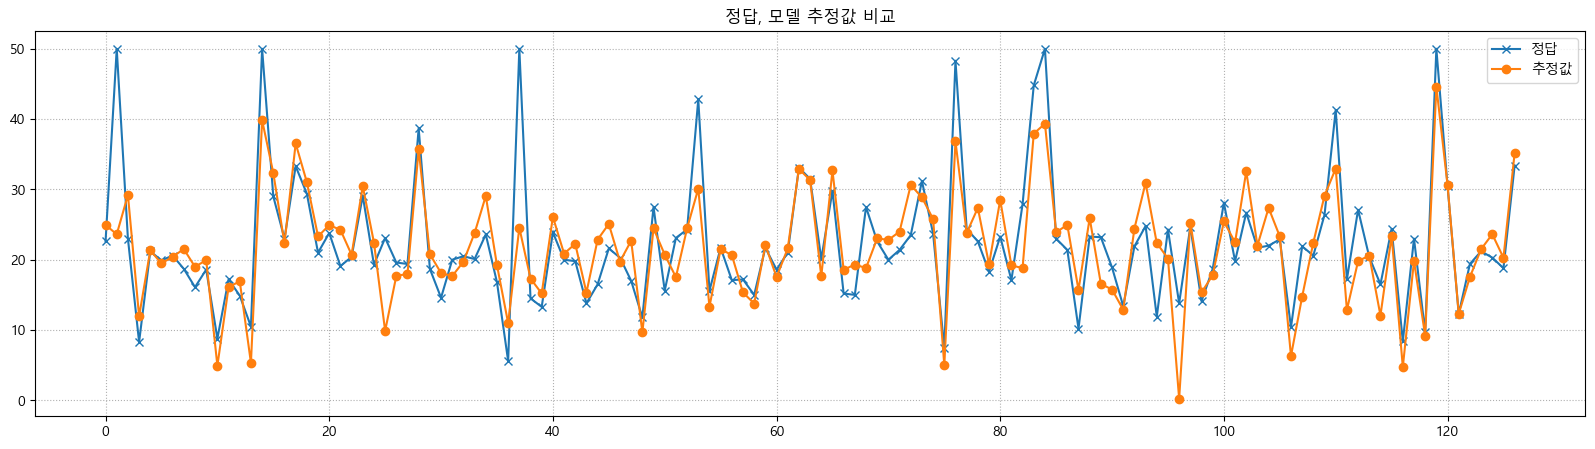

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))
x = range(len(y_test)) # index
plt.plot(x, y_test, marker='x', label="정답")
plt.plot(x, pred_test, marker='o', label="추정값")
plt.legend()
plt.grid(True, linestyle=':')
plt.title("정답, 모델 추정값 비교")
plt.show()

## 규제 (Regularization)
- 선형 회귀 모델에서 **과대적합(Overfitting) 문제를 해결하기 위해** 가중치(회귀계수)에 페널티 값을 적용한다.
- 입력데이터의 Feature들이 너무 많은 경우 Overfitting이 발생.
    - Feature수에 비해 관측치 수가 적은 경우 모델이 복잡해 지면서 Overfitting이 발생한다.
- 해결
    - 데이터를 더 수집한다. 
    - Feature selection
        - 불필요한 Features들을 제거한다.
    - 규제 (Regularization) 을 통해 Feature들에 곱해지는 가중치가 커지지 않도록 제한한다.(0에 가까운 값으로 만들어 준다.)
        - LinearRegression의 규제는 학습시 계산하는 오차를 키워서 모델이 오차를 줄이기 위해 가중치를 0에 가까운 값으로 만들도록 하는 방식을 사용한다.
        - L1 규제 (Lasso)
        - L2 규제 (Ridge)

## Ridge Regression (L2 규제)
- 손실함수(loss function)에 규제항으로 $\alpha \sum_{i=1}^{n}{w_{i}^{2}}$ (L2 Norm)을 더해준다.
- $\alpha$는 하이퍼파라미터로 모델을 얼마나 많이 규제할지 조절한다. 
    - $\alpha = 0$ 에 가까울수록 규제가 약해진다. (0일 경우 선형 회귀동일)
    - $\alpha$ 가 커질 수록 모든 가중치가 작아져(0에 가깝게된다.) 입력데이터의 Feature들 중 중요하지 않은 Feature의 예측에 대한 영향력이 작아지게 된다.

$$
\text{손실함수}(w) = \text{MSE}(w) + \alpha \cfrac{1}{2}\sum_{i=1}^{n}{w_{i}^{2}}
$$


## Lasso(Least Absolut Shrinkage and Selection Operator) Regression (L1 규제)

- 손실함수에 규제항으로 $\alpha \sum_{i=1}^{n}{\left| w_i \right|}$ (L1 Norm)더한다.
- Lasso 회귀의 상대적으로 덜 중요한 특성의 가중치를 0으로 만들어 자동으로 Feature Selection이 된다.

$$
\text{손실함수}(w) = \text{MSE}(w) + \alpha \sum_{i=1}^{n}{\left| w_i \right|}
$$

<font size=5><span style="background-color:#fff5b1">**Lasso는 가중치들이 0이 되지만, Ridge의 가중치들은 0에 가까워질 뿐 0이 되지는 않는다.**</span></font>
<br><br>
> **손실함수(Loss Function):** 모델의 예측한 값과 실제값 사이의 차이를 정의하는 함수로 모델이 학습할 때 사용된다.
> <br><br>**MSE** : 모든 예측값들의 (정답-예측값)^2 계산결과의 평균 값.

In [41]:
from sklearn.linear_model import Ridge, Lasso
from metrics import print_metrics_regression

---

## Ridge

In [18]:
alpha = 1
ridge = Ridge(alpha=alpha, random_state=0)
ridge.fit(X_train_scaled, y_train)

print_metrics_regression(y_train, ridge.predict(X_train_scaled), "Train set")
print()
print_metrics_regression(y_test, ridge.predict(X_test_scaled),"Test set")

=================Train set=================
MSE :  19.64194935381896
RMSE :  4.431923888540839
MAE :  3.1008864055893786
R2 :  0.76975318699993

=================Test set=================
MSE :  29.853763334547597
RMSE :  5.46385974696895
MAE :  3.6685057258271088
R2 :  0.6345884564889055


In [19]:
print(f"coefficient : \n{ridge.coef_} \n\n bias : {ridge.intercept_}")

coefficient : 
[-0.96187481  1.02775462 -0.06861144  0.59814087 -1.77318401  2.6205672
 -0.20466821 -2.96504904  2.00091047 -1.85840697 -2.14955893  0.75175979
 -3.57350065] 

 bias : 22.608707124010557


In [22]:
import pandas as pd
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100, 500, 1000]
# alpha
# 규제가 약해짐<------------ default : 1 ---------------> 규제가 강해짐.

# alpha 의 변화에 따른 weight의 변화를 저장할 DataFrame
coef_df = pd.DataFrame() # coef_들
bias_list = [] # intercept_

for alpha in alpha_list:
    ridge = Ridge(alpha=alpha, random_state=0)
    ridge.fit(X_train_scaled, y_train)
    
    # weight와 bias 저장
    coef_df[f"alpha: {alpha}"] = ridge.coef_
    bias_list.append(ridge.intercept_)
    
    print(f"-------------{alpha}---------------")
#     print_metrics_regression(y_train, ridge.predict(X_train_scaled), "train")
    print_metrics_regression(y_test, ridge.predict(X_test_scaled), "test")
    print("\n")

-------------0.001---------------
=================test=================
MSE :  29.782317016526232
RMSE :  5.457317749272644
MAE :  3.668330439118321
R2 :  0.6354629629641464


-------------0.01---------------
=================test=================
MSE :  29.782964300126405
RMSE :  5.457377053138844
MAE :  3.6683330470353672
R2 :  0.6354550401807848


-------------0.1---------------
=================test=================
MSE :  29.789433705566623
RMSE :  5.457969742089692
MAE :  3.668358050003145
R2 :  0.6353758543374117


-------------1---------------
=================test=================
MSE :  29.853763334547597
RMSE :  5.46385974696895
MAE :  3.6685057258271088
R2 :  0.6345884564889055


-------------10---------------
=================test=================
MSE :  30.451903373741917
RMSE :  5.518324326617811
MAE :  3.6655743439804733
R2 :  0.6272671927504457


-------------100---------------
=================test=================
MSE :  34.00022384210578
RMSE :  5.830971089115927
M

#### alpha 값이 커질수록 각 coefficient(가중치들)이 0에 가까워졌다.
#### => alpha 값이 커질수록 규제가 강해진다!

In [40]:
coef_df

,alpha: 0.001,alpha: 0.01,alpha: 0.1,alpha: 1,alpha: 10,alpha: 100,alpha: 500,alpha: 1000
0,-0.970992,-0.970907,-0.970063,-0.961875,-0.898519,-0.702647,-0.534735,-0.442678
1,1.046659,1.046484,1.044735,1.027755,0.895907,0.542402,0.432019,0.382202
2,-0.040477,-0.040742,-0.043379,-0.068611,-0.241628,-0.539236,-0.571494,-0.512882
3,0.594092,0.594130,0.594509,0.598141,0.623200,0.643067,0.469501,0.333552
4,-1.808732,-1.808405,-1.805134,-1.773184,-1.512895,-0.685798,-0.406040,-0.371299
5,2.609931,2.610030,2.611019,2.620567,2.689748,2.650139,1.776278,1.253866
6,-0.198240,-0.198300,-0.198901,-0.204668,-0.245227,-0.308313,-0.332627,-0.327295
7,-3.002128,-3.001789,-2.998407,-2.965049,-2.671723,-1.379397,-0.332010,-0.062878
8,2.080133,2.079392,2.072006,2.000910,1.486602,0.301828,-0.209340,-0.283024
9,-1.932813,-1.932113,-1.925143,-1.858407,-1.398256,-0.630364,-0.526917,-0.477386


---

## Lasso

In [23]:
alpha_list2 = [0.001, 0.01, 0.1, 1, 5, 10]

coef_df2 = pd.DataFrame()
bias_list2 = []

for alpha in alpha_list2:
    
    lasso = Lasso(alpha=alpha, random_state=0)
    lasso.fit(X_train_scaled, y_train)
    
    coef_df2[f'alpha: {alpha}'] = lasso.coef_
    bias_list2.append(lasso.intercept_)
    
    print(f"alphaL {alpha}-----------------------")
#     print_metrics_regression(y_train, lasso.predict(X_train_scaled), "train")
    print_metrics_regression(y_test, lasso.predict(X_test_scaled), "test")
    print()

alphaL 0.001-----------------------
=================test=================
MSE :  29.79125513018357
RMSE :  5.45813659871055
MAE :  3.6681969731021136
R2 :  0.635353560009785

alphaL 0.01-----------------------
=================test=================
MSE :  29.876831576246808
RMSE :  5.465970323396094
MAE :  3.666910669625586
R2 :  0.6343061000666704

alphaL 0.1-----------------------
=================test=================
MSE :  31.17372483937395
RMSE :  5.583343517944597
MAE :  3.680155684725112
R2 :  0.6184320622196557

alphaL 1-----------------------
=================test=================
MSE :  35.489636168280335
RMSE :  5.957317866983458
MAE :  3.9285318553756814
R2 :  0.5656050935497575

alphaL 5-----------------------
=================test=================
MSE :  59.87237303347597
RMSE :  7.737724021537339
MAE :  5.2531417018931945
R2 :  0.2671591853038978

alphaL 10-----------------------
=================test=================
MSE :  81.7904659829155
RMSE :  9.043808157126925
M

In [24]:
coef_df2

,alpha: 0.001,alpha: 0.01,alpha: 0.1,alpha: 1,alpha: 5,alpha: 10
0,-0.967848,-0.939492,-0.659315,-0.000000,-0.000000,-0.0
1,1.043088,1.010377,0.684820,0.000000,0.000000,0.0
2,-0.042280,-0.057475,-0.207389,-0.000000,-0.000000,-0.0
3,0.593919,0.592324,0.575874,0.000000,0.000000,0.0
4,-1.804056,-1.761604,-1.345790,-0.000000,-0.000000,-0.0
5,2.611194,2.622904,2.738958,2.529330,0.374985,0.0
6,-0.196298,-0.179110,-0.007398,-0.000000,-0.000000,-0.0
7,-2.994364,-2.923287,-2.216914,-0.000000,0.000000,0.0
8,2.065494,1.933983,0.632402,-0.000000,-0.000000,-0.0
9,-1.920598,-1.811185,-0.724794,-0.227631,-0.000000,-0.0


# 정리
- 일반적으로 선형회귀의 경우 어느정도 규제가 있는 경우가 성능이 좋다.
- 기본적으로 **Ridge**를 사용한다.
- Target에 영향을 주는 Feature가 몇 개뿐일 경우 특성의 가중치를 0으로 만들어 주는 **Lasso** 사용한다. 

# 로지스틱 회귀
- 선형회귀 알고리즘을 이용한 이진 분류 모델
- Sample이 특정 클래스에 속할 확률을 추정한다. 

## LogisticRegression 주요 하이퍼파라미터
- penalty: 과적합을 줄이기 위한 규제방식
    - 'l1', 'l2'(기본값), 'elasticnet', 'none' 
- C: 규제강도(기본값 1) - 작을 수록 규제가 강하다(단순).
- max_iter(기본값 100) : 경사하강법 반복횟수

In [26]:
from dataset import get_breast_cancer_dataset

from sklearn.linear_model import LogisticRegression
from metrics import print_metrics_classification

In [27]:
(X_train, X_test, y_train, y_test), feature_names = get_breast_cancer_dataset(scaling=True)

In [28]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [29]:
lr.coef_

array([[-0.54384088, -0.34034271, -0.49560632, -0.56663005, -0.05559393,
         0.3999005 , -0.80734348, -1.10605291,  0.02920742,  0.40610307,
        -1.21922963, -0.13909852, -0.51970089, -0.76005919, -0.21510325,
         0.69981736,  0.02923076, -0.35243416,  0.47310794,  0.55701021,
        -0.99402288, -1.10967269, -0.77768019, -0.87390453, -0.46969384,
        -0.13650097, -0.68987558, -0.91744655, -0.70517455, -0.74475703]])

In [30]:
lr.intercept_

array([0.33121447])

In [31]:
pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)
pred_test[:5]

array([1, 0, 0, 1, 0])

In [33]:
proba_train = lr.predict_proba(X_train)
proba_test = lr.predict_proba(X_test)
proba_test[:5]

array([[4.22769360e-03, 9.95772306e-01],
       [9.99974485e-01, 2.55153473e-05],
       [9.99772750e-01, 2.27249551e-04],
       [4.26402511e-04, 9.99573597e-01],
       [9.97490889e-01, 2.50911147e-03]])

In [34]:
print_metrics_classification(y_train, pred_train, proba_train[:, 1], "train set")
print_metrics_classification(y_test, pred_test, proba_test[:, 1], "test set")

=================train set=================
정확도 Accuracy :  0.9906103286384976
재현율 Recall :  0.9962546816479401
정밀도 Precision :  0.9888475836431226
F-1 Score :  0.9925373134328358
Average Precision :  0.9985900639964462
ROC-AUC :  0.9979271194026335
=================test set=================
정확도 Accuracy :  0.958041958041958
재현율 Recall :  0.9666666666666667
정밀도 Precision :  0.9666666666666667
F-1 Score :  0.9666666666666667
Average Precision :  0.9971317270472638
ROC-AUC :  0.9951781970649896


In [39]:
from sklearn.model_selection import GridSearchCV

params = {
    'penalty':['l1', 'l2'], #l1: Lasso, l2: Ridge, None: Linear Regression
    'C':[0.01, 0.1, 1, 5, 10], # 작을수록 강한 규제(overfitting: 작은값으로 변경.)
}

# solver: 최적화 알고리즘 -> 경사하강법을 개선한 알고리즘.
gs = GridSearchCV(LogisticRegression(random_state=0, solver='liblinear'), 
                  params, 
                  scoring='accuracy', 
                  cv=4, 
                  n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 5, 10], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [36]:
gs.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [37]:
gs.best_score_

0.9813084112149533

In [38]:
import pandas as pd
result = pd.DataFrame(gs.cv_results_)
result.sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
3,0.003241,0.000432,0.001747,0.000433,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.953271,0.971963,1.000000,1.000000,0.981308,0.019825,1
5,0.004736,0.000433,0.001496,0.000498,1,l2,"{'C': 1, 'penalty': 'l2'}",0.953271,0.971963,0.990566,0.981132,0.974233,0.013774,2
2,0.003872,0.001329,0.001378,0.000819,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",0.943925,0.971963,0.981132,0.990566,0.971896,0.017437,3
1,0.003491,0.000498,0.001246,0.000430,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.925234,0.971963,0.990566,0.981132,0.967224,0.025119,4
4,0.003990,0.001222,0.000997,0.000002,1,l1,"{'C': 1, 'penalty': 'l1'}",0.943925,0.962617,0.981132,0.981132,0.967202,0.015419,5


# 최적화 (Optimize)
- 모델이 예측한 결과와 정답간의 차이(오차)를 가장 적게 만드는 Parameter를 찾는 과정을 최적화라고 한다.
- 모델의 예측값과 실제 값의 차이를 계산하는 함수를 만들고 그 값이 최소가 되는 지점을 찾는 작업을 한다.

## 최적화 문제
- 함수 f(w) 의 값을 최소화(또는 최대화) 하는 변수 w(파라미터)를 찾는 것.
$$
w_{i} = \arg \min_w f(w) 
$$

- **f(w) : 손실함수**
- 손실함수에 어떤 w(파라미터)를 전달했을 때 손실이 가장 적을까를 찾는 과정 => `최적화`

### 손실함수(Loss Function), 비용함수(Cost Function), 목적함수(Object Function), 오차함수(Error Function)
- <u>모델의 예측한 값과 실제값 사이이 얼마나 차이나는지(오차)를 계산하는 함수</u>로 모델이 학습할 때 사용된다.
- 이 함수의 반환값(Loss)을 최소화 하는 파라미터을 찾는 것이 최적화의 목적이다.
- 해결하려는 문제에 맞춰 Loss 함수를 정의한다.
    - Classification(분류)의 경우 `cross entropy` 를 사용한다.
    - Regression(회귀)의 경우 `MSE(Mean Squared Error)` 를 사용한다.
    
## 최적화 문제를 해결하는 방법
- Loss 함수 최적화 함수를 찾는다.
    - Loss를 최소화하는 weight들을 찾는 함수(공식)을 찾는다.
    - Feature와 sample 수가 많아 질 수록 계산량이 급증한다.
    - 최적화 함수가 없는 Loss함수도 있다.
    - '한번에 찾으려고 하는 느낌'<br><br>
- **경사하강법 (Gradient Descent)** => 딥러닝과 연결..
    - 값을 조금씩 조금씩 조정해나가면서 **최솟값**을 찾는다.

## 경사하강법 (Gradient Descent)⭐🚀
- 다양한 종류의 문제에서 최적의 해법을 찾을 수 있는 **일반적인 최적화 알고리즘**
- 손실함수를 최소화하는 파라미터를 찾기위해 반복해서 조정해 나간다. 
    - 파라미터 벡터 $W$에 대해 손실함수의 현재 gradient(경사,기울기)를 계산한다.
    - gradient가 감소하는 방향으로 벡터 $W$를 조정한다.
    - gradient가 0이 될때 까지 반복한다.
- gradient가 양수이면 loss와 weight가 비례관계란 의미이므로 loss를 더 작게 하려면 weight가 작아져야 한다.    
- gradient가 음수이면 loss와 weight가 반비례관계란 의미이므로 loss를 더 작게 하려면 weight가 커져야 한다.

- 로지스틱 회귀의 최적화 방식.
<br>

> 1. 초기 파라미터 설정
2. 방향 찾기
3. 하나씩 대입하면서 값 비교
4. `2.`, `3.` 반복 하면서 최솟값 찾기

### 파라미터 조정

$$
W_{new} = W-\alpha\frac{\partial}{\partial {W}}cost(W)
$$


<center>$W$: 파라미터<br>$\alpha$:학습률<br></center> 

- 학습률 (Learning rate)
    - 기울기에 따라 이동할 step의 크기. 경사하강법 알고리즘에서 지정해야하는 하이퍼 파라미터이다.
    - `학습률을 너무 작게 잡으면` <u>최소값에 수렴하기 위해 많은 반복을 진행해야해 시간이 오래걸린다.</u>
    - `학습률을 너무 크게 잡으면` 왔다 갔다 하다가 오히려 <u>더 큰 값으로 발산하여 최소값에 수렴하지 못하게 된다.</u>